# Tong Jiang 2018311464
# This code is for the electronic structure of Su-Schrieffer-Heeger Model
# The homework for Prof Shuai's Theoretical Chemical Physics

In [1]:
import numpy as np

In [2]:
import matplotlib

In [3]:
#matplotlib.use('nbagg')

In [4]:
import matplotlib.pyplot as plt

The parameters come from Page 42 of 《高聚物中的孤子和极化子》,
$t$ describes the interaction energy between NN atoms(eV);
$\alpha$ describes the rate for t changes with bond length(Angstrom); K is the elastic constant;

In [5]:
t = 2.5

In [6]:
alpha = 4.1

In [7]:
K = 21

In [8]:
N = 101 # the lattice length

In [9]:
Ne = 100

The eigenvalue equation writes,
$$-[t_0+(-1)^m\alpha(\phi_m+\phi_{m+1})]Z_{\mu,m+1}-[t_0+(-1)^{m-1}\alpha(\phi_{m-1}+\phi_{m})]Z_{\mu, m+1}=\varepsilon_{\mu}Z_{\mu,m}$$

$\rm{coord\_add}[m-1]$ is $\phi_{m}+\phi_{m+1}$ , particularly, $\rm{coord\_add}[100]$ is $\phi_{100}+\phi_{1}$ to ensure the peoridical boundary condition

Combined with $$\phi_m+\phi_{m+1}=(-1)^m \frac{2\alpha}{K}[\sum_{\mu}'Z_{\mu, m}Z_{\mu, m+1}-\frac{1}{N}\sum_{1}^{N}'Z_{\mu, m}Z_{\mu, m+1}]$$ to solve $\phi_m+\phi_{m+1}$ and $Z_{\mu}$ iteratively

In [10]:
coord_add = np.random.rand(N-1,)*0.1 - 0.05

In [11]:
coord_add = coord_add.tolist()

In [12]:
temp = np.sum([coord_add[x-1]*(-1)**x for x in range(1, N)])

In [13]:
coord_add.append(-temp/((-1)**N)) # the boundary condition

In [14]:
iter_num = 0

In [15]:
while iter_num < 100:
    iter_num += 1
    sub_diag = [-(t + (-1)**m * alpha * coord_add[m-1])
                for m in range(1, N)]
    Mat = np.diag(sub_diag, k=-1) + np.diag(sub_diag, k=1)
    Mat[0, -1] = -(t + (-1)**N * alpha * coord_add[-1])
    Mat[-1, 0] = -(t + (-1)**N * alpha * coord_add[-1])
    eigva, eigve = np.linalg.eigh(Mat)
    ZZ = []
    for i in range(1, N+1):
        if i != N:
            zz = [eigve[i-1, x] * eigve[i, x] for x in range(Ne//2)]
        else:
            zz = [eigve[0, x] * eigve[-1, x] for x in range(Ne//2)]
        ZZ.append(2 * np.sum(zz))
    # this is for the case of odd numbers of electrons, eg. N=101, Ne=101
    if Ne % 2 != 0:
        ZZ[:N-1] = [(ZZ[x] + eigve[x-1, Ne//2]*eigve[x, Ne//2])
                    for x in range(1, N)]
        ZZ[-1] = ZZ[-1] + eigve[0, Ne//2]*eigve[-1, Ne//2]
    ZZ_tot = np.sum(ZZ)
    for i in range(1, N+1):
            coord_add[i-1] = (-1)**(i) * 2 * alpha / K * (ZZ[i-1] - ZZ_tot / N)

In [16]:
for i in range(N):
    plt.plot(range(2), [eigva[i]]*2, 'k')

The energy levels are drawn below.

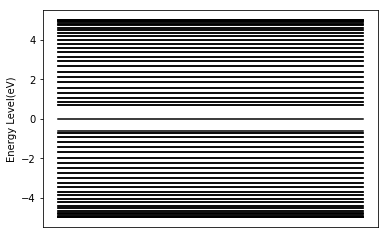

In [17]:
plt.xticks([]);plt.ylabel('Energy Level(eV)');plt.show()

In [18]:
coord_mean = [x/2 for x in coord_add]

In [19]:
plt.plot(coord_mean)

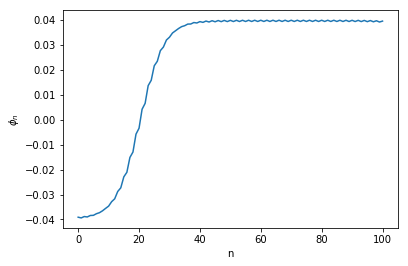

In [20]:
plt.ylabel('$\phi_n$');plt.xlabel('n');plt.show()

# Now we want to consider another case, what about using the open boundary condition?

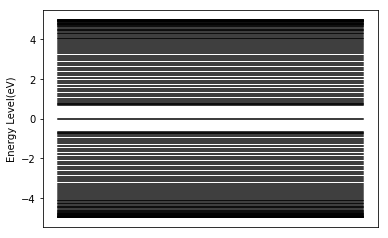

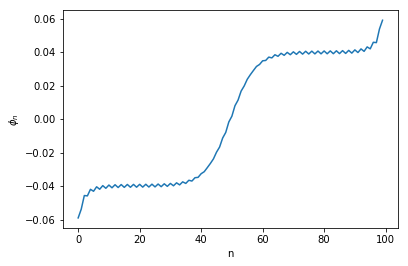

In [21]:
coord_add = [0] * (N-1)
iter_num = 0
while iter_num < 20:
    iter_num += 1
    sub_diag = [-(t + (-1)**m * alpha * coord_add[m-1])
                for m in range(1, N)]
    Mat = np.diag(sub_diag, k=-1) + np.diag(sub_diag, k=1)
    #Mat[0, -1] = -(t + (-1)**N * alpha * coord_add[-1])
    #Mat[-1, 0] = -(t + (-1)**N * alpha * coord_add[-1])
    eigva, eigve = np.linalg.eigh(Mat)
    ZZ = []
    for i in range(1, N):
        zz = [eigve[i-1, x] * eigve[i, x] for x in range(Ne//2)]
        ZZ.append(2 * np.sum(zz))
    if Ne % 2 != 0:
        ZZ[:N-1] = [(ZZ[x] + eigve[x-1, Ne//2]*eigve[x, Ne//2])
                    for x in range(1, N)]
        ZZ[-1] = ZZ[-1] + eigve[0, Ne//2]*eigve[-1, Ne//2]
    ZZ_tot = np.sum(ZZ)
    for i in range(1, N):
        coord_add[i-1] = (-1)**(i) * 2 * alpha / K * (ZZ[i-1] - ZZ_tot / (N-1))
for i in range(N):
    plt.plot(range(2), [eigva[i]]*2, 'k')
plt.xticks([]);plt.ylabel('Energy Level(eV)');plt.show()
coord_mean = [x/2 for x in coord_add]; plt.plot(coord_mean)
plt.ylabel('$\phi_n$');plt.xlabel('n');plt.show()
    